<a href="https://colab.research.google.com/github/Jasleen8801/text_mining/blob/main/Lab_sheet_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Labsheet 4**
# **Clustering Text Data in Python**

**Objective:**

This lab will guide you through the process of clustering text data using different clustering techniques: K-means, K-medoids, and Agglomerative clustering. By the end of the lab, you'll have hands-on experience with these algorithms and understand how to apply them to text data.

1. Preprocessing Text Data

   Load the Datase: Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Load the dataset:

In [2]:
from nltk.corpus import movie_reviews
nltk.download('movie_reviews')

documents = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]
labels = [fileid.split('/')[0] for fileid in movie_reviews.fileids()]

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


2. Text Preprocessing

   Tokenize, remove stopwords, and lemmatize the text

In [3]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

processed_documents = [preprocess_text(doc) for doc in documents]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


3. Convert Text to Numerical Data

    Use TF-IDF to convert text data into numerical format

In [4]:
vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(processed_documents).toarray()

**Part 2: K-means Clustering**

1. Apply K-means Clustering

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
labels_kmeans = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2. Visualize the Clusters

    Use TruncatedSVD to reduce dimensions and visualize the clusters:

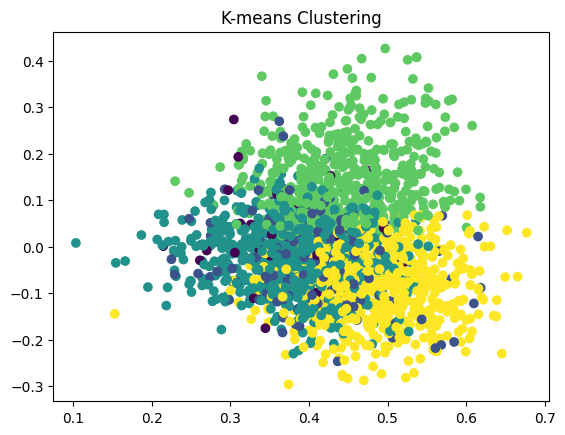

In [9]:
svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(X)

import matplotlib.pyplot as plt
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels_kmeans, cmap='viridis')
plt.title('K-means Clustering')
plt.show()


**Part 3: K-medoids Clustering**

1.Install and Import Necessary Libraries

   Install the sklearn_extra library for K-medoids clustering:

In [10]:
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.8 MB/s eta 0:00:00


Import the required module:

In [11]:
from sklearn_extra.cluster import KMedoids

2. Apply K-medoids Clustering

In [12]:
kmedoids = KMedoids(n_clusters=5, random_state=42)
kmedoids.fit(X)
labels_kmedoids = kmedoids.labels_


3. Visualize the Clusters



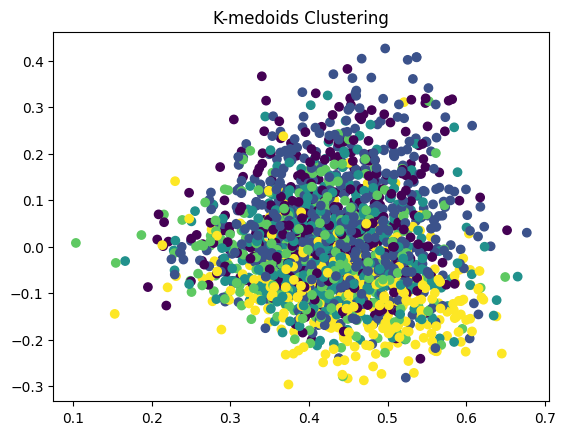

In [13]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels_kmedoids, cmap='viridis')
plt.title('K-medoids Clustering')
plt.show()


**Part 4: Agglomerative Clustering**

1. Apply Agglomerative Clustering

In [14]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=5)
labels_agglo = agglo.fit_predict(X)


2. Visualize the Clusters

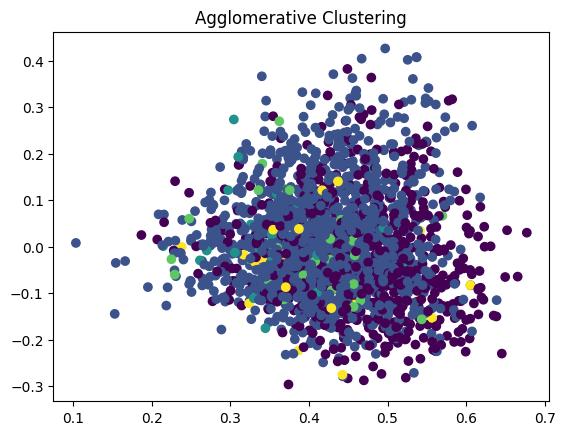

In [15]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels_agglo, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()


**Part 5: Evaluation**
1. Silhouette Score

    Calculate the silhouette score for each clustering method:

In [16]:
from sklearn.metrics import silhouette_score

score_kmeans = silhouette_score(X, labels_kmeans)
score_kmedoids = silhouette_score(X, labels_kmedoids)
score_agglo = silhouette_score(X, labels_agglo)

print(f'Silhouette Score for K-means: {score_kmeans}')
print(f'Silhouette Score for K-medoids: {score_kmedoids}')
print(f'Silhouette Score for Agglomerative Clustering: {score_agglo}')


Silhouette Score for K-means: 0.009157473303154123
Silhouette Score for K-medoids: -0.00047377512129200737
Silhouette Score for Agglomerative Clustering: 0.0037680412948688366


Excercise

1. Implement the K-means algorithm from scratch, and introduce modifications or improvements to enhance its performance compared to the traditional K-means algorithm. Explain the rationale behind your improvements and how they address the limitations of the standard K-means method.

2. Implement Agglomerative Clustering using Single, Complete, and Average Linkage methods. Apply these methods to a dataset, visualize the clustering results, and compare the performance and outcomes of the three methods using appropriate evaluation metrics.

Kmeans Algorithm

In [17]:
import numpy as np

class KMeans:
    def __init__(self, k=5, max_iter=100, tol=1e-4):
        self.k = k
        self.max_iter = max_iter
        self.tol = tol
        self.centroids = {}
        self.classifications = {}

    def fit(self, X):
        indices = np.random.choice(len(X), self.k, replace=False)
        for i in range(self.k):
            self.centroids[i] = X[indices[i]]

        for _ in range(self.max_iter):
            self.classifications = {i: [] for i in range(self.k)}

            for featureset in X:
                distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)

            optimized = True
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.any(original_centroid):
                    shift = np.sum((current_centroid - original_centroid) / original_centroid * 100.0)
                else:
                    shift = np.sum(current_centroid - original_centroid)

                if shift > self.tol:
                    optimized = False

            if optimized:
                break

    def predict(self, data):
        distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

<ipython-input-17-ce8f6acbfba8>:35: RuntimeWarning: divide by zero encountered in divide
  shift = np.sum((current_centroid - original_centroid) / original_centroid * 100.0)
<ipython-input-17-ce8f6acbfba8>:35: RuntimeWarning: invalid value encountered in divide
  shift = np.sum((current_centroid - original_centroid) / original_centroid * 100.0)


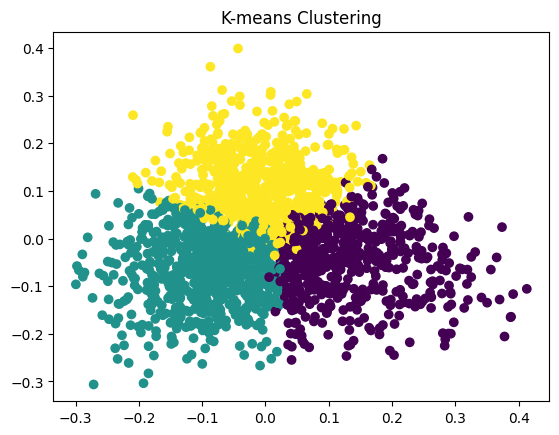

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

kmeans = KMeans(k=3)
kmeans.fit(X)

labels_kmeans = np.array([kmeans.predict(x) for x in X])

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels_kmeans, cmap='viridis')
plt.title('K-means Clustering')
plt.show()


Agglomerative Clustering

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import heapq

def euclidean_distance(cluster1, cluster2):
    cluster1_center = np.mean(cluster1, axis=0)
    cluster2_center = np.mean(cluster2, axis=0)
    return np.linalg.norm(cluster1_center - cluster2_center)

class AgglomerativeClustering:
    def __init__(self, distance_metric=euclidean_distance):
        self.distance_metric = distance_metric
        self.clusters = []
        self.distances = {}
        self.heap = []

    def calculate_initial_distances(self):
        for i, cluster1 in enumerate(self.clusters):
            for j, cluster2 in enumerate(self.clusters):
                if i < j:
                    distance = self.distance_metric(cluster1, cluster2)
                    self.distances[(i, j)] = distance
                    heapq.heappush(self.heap, (distance, (i, j)))

    def merge_clusters(self):
        while self.heap:
            min_distance, merge_indices = heapq.heappop(self.heap)
            cluster1_idx, cluster2_idx = merge_indices
            if cluster1_idx in self.distances and cluster2_idx in self.distances:
                break

        cluster1_idx, cluster2_idx = merge_indices
        new_cluster = self.clusters[cluster1_idx] + self.clusters[cluster2_idx]

        # Remove the old clusters and update the cluster list
        self.clusters[cluster1_idx] = new_cluster
        self.clusters.pop(cluster2_idx)

        # Remove merged clusters from the distances dictionary
        for i in range(len(self.clusters)):
            if (i, cluster1_idx) in self.distances:
                del self.distances[(i, cluster1_idx)]
            if (i, cluster2_idx) in self.distances:
                del self.distances[(i, cluster2_idx)]

        # Calculate distances for the new cluster
        for i, cluster in enumerate(self.clusters):
            if i != cluster1_idx:
                distance = self.distance_metric(cluster, new_cluster)
                heapq.heappush(self.heap, (distance, (min(i, cluster1_idx), max(i, cluster1_idx))))
                self.distances[(min(i, cluster1_idx), max(i, cluster1_idx))] = distance

    def fit(self, X, max_clusters=None):
        self.clusters = [[x] for x in X]
        self.distances = {}
        self.heap = []

        self.calculate_initial_distances()

        while len(self.clusters) > max_clusters:
            self.merge_clusters()

        return self.clusters

    def get_cluster_labels(self, X):
        labels = np.zeros(len(X), dtype=int)
        for cluster_id, cluster in enumerate(self.clusters):
            for point in cluster:
                index = np.where(np.all(X == point, axis=1))[0][0]
                labels[index] = cluster_id
        return labels

    def plot_dendrogram(self, X):
        linked = linkage(X, method='ward')
        dendrogram(linked, labels=range(len(X)))
        plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

agglo = AgglomerativeClustering()
clusters = agglo.fit(X, max_clusters=3)

labels_agglo = agglo.get_cluster_labels(X)

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels_agglo, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()

agglo.plot_dendrogram(X)
